In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
adult=pd.read_csv("adult_with_headers_(1)[1].csv")
adult.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
adult.info()
print("\nMissing values count per column:")
print(adult.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing values count per column:
age               0
workclass         0
fnlwgt            0

## 1.	Handle missing values as per the best practices (imputation, removal, etc.).

In [5]:
for col in adult.select_dtypes(include='object').columns:
    if '?' in adult[col].unique():
        print(f"Column '{col}' has {adult[adult[col] == '?'].shape[0]} missing values ('?')")


 #### Based on the identification of '?' as missing values in categorical columns, I will replace these '?' characters with np.nan to standardize the missing value representation before proceeding with imputation.

In [6]:
for col in ['workclass', 'occupation', 'native_country']:
    adult[col] = adult[col].replace('?', np.nan)

print("Count of '?' replaced with NaN in relevant columns:")
print(adult[['workclass', 'occupation', 'native_country']].isnull().sum())

Count of '?' replaced with NaN in relevant columns:
workclass         0
occupation        0
native_country    0
dtype: int64


### ●	Apply scaling techniques to numerical features:
### a.	Standard Scaling   b. Min-Max Scaling


#### Standard Scaling

In [7]:
numerical_cols = adult.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns identified for scaling:")
print(numerical_cols)

Numerical columns identified for scaling:
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(adult[numerical_cols])

# Convert the scaled features back to a DataFrame for better readability
scaled_adult_standard = pd.DataFrame(scaled_numerical_features, columns=numerical_cols)

print("First 5 rows of Standard Scaled numerical features:")
print(scaled_adult_standard.head())

First 5 rows of Standard Scaled numerical features:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


In [16]:
print(" Discuss Use Cases for Standard Scaling")
print("Description Standard Scaling transforms data to have a mean of 0 and a standard deviation of 1. It centers the data around the mean and scales it by the standard deviation.")

 Discuss Use Cases for Standard Scaling
Description Standard Scaling transforms data to have a mean of 0 and a standard deviation of 1. It centers the data around the mean and scales it by the standard deviation.


 #### Apply Min-Max Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
scaled_numerical_features_minmax = minmax_scaler.fit_transform(adult[numerical_cols])

# Convert the scaled features back to a DataFrame for better readability
scaled_adult_minmax = pd.DataFrame(scaled_numerical_features_minmax, columns=numerical_cols)

print("First 5 rows of Min-Max Scaled numerical features:")
print(scaled_adult_minmax.head())

First 5 rows of Min-Max Scaled numerical features:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


In [17]:
print("Min-Max Scaling (Normalization)")
print("Description: Min-Max Scaling transforms data to a fixed range, typically between 0 and 1. It shifts and rescales values so that the minimum value is mapped to 0 and the maximum value to 1.")

Min-Max Scaling (Normalization)
Description: Min-Max Scaling transforms data to a fixed range, typically between 0 and 1. It shifts and rescales values so that the minimum value is mapped to 0 and the maximum value to 1.


## 2. Encoding Techniques:

### A.One-Hot Encoding to categorical 
### B.Label Encoding 
#### variables with less than 5 categories

In [19]:
categorical_cols = adult.select_dtypes(include='object').columns.tolist()

print("Categorical columns and their unique value counts:")
for col in categorical_cols:
    print(f"Column '{col}': {adult[col].nunique()} unique values")

Categorical columns and their unique value counts:
Column 'workclass': 9 unique values
Column 'education': 16 unique values
Column 'marital_status': 7 unique values
Column 'occupation': 15 unique values
Column 'relationship': 6 unique values
Column 'race': 5 unique values
Column 'sex': 2 unique values
Column 'native_country': 42 unique values
Column 'income': 2 unique values


In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Separate columns for One-Hot Encoding and Label Encoding
ohe_cols = []
le_cols = []

for col in categorical_cols:
    if adult[col].nunique() < 5:
        ohe_cols.append(col)
    else:
        le_cols.append(col)

print(f"Columns for One-Hot Encoding: {ohe_cols}")
print(f"Columns for Label Encoding: {le_cols}")

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_encoded_features = encoder.fit_transform(adult[ohe_cols])

# Create a DataFrame from the One-Hot Encoded features
ohe_feature_names = encoder.get_feature_names_out(ohe_cols)
adult_ohe = pd.DataFrame(ohe_encoded_features, columns=ohe_feature_names)

print("\nFirst 5 rows of One-Hot Encoded features:")
print(adult_ohe.head())

Columns for One-Hot Encoding: ['sex', 'income']
Columns for Label Encoding: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']

First 5 rows of One-Hot Encoded features:
   sex_ Female  sex_ Male  income_ <=50K  income_ >50K
0          0.0        1.0            1.0           0.0
1          0.0        1.0            1.0           0.0
2          0.0        1.0            1.0           0.0
3          0.0        1.0            1.0           0.0
4          1.0        0.0            1.0           0.0


In [21]:
adult_le = adult.copy()

for col in le_cols:
    le = LabelEncoder()
    adult_le[col] = le.fit_transform(adult_le[col])

print("First 5 rows of Label Encoded features (selected columns):")
print(adult_le[le_cols].head())

First 5 rows of Label Encoded features (selected columns):
   workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  
0              39  
1              39  
2              39  
3              39  
4               5  


In [22]:
print("Based on the unique value counts, I will separate categorical columns into two groups: those with less than 5 unique values for One-Hot Encoding and those with 5 or more unique values for Label Encoding. I will then perform One-Hot Encoding on the first group.")

Based on the unique value counts, I will separate categorical columns into two groups: those with less than 5 unique values for One-Hot Encoding and those with 5 or more unique values for Label Encoding. I will then perform One-Hot Encoding on the first group.


## Data Exploration and Preprocessing:

#### ●	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
#### ●	les with more than 5 categories.


In [29]:
print("Summary statistics for numerical columns:")
display(adult.describe())

print("Data types")
print(adult.dtypes)

print("\nSummary statistics for categorical columns:")
display(adult.describe(include='object'))

Summary statistics for numerical columns:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Data types
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Summary statistics for categorical columns:


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


### the pros and cons of One-Hot Encoding and Label Encoding.

## 3. Feature Engineering:

### ●	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

##### Create a new feature named 'Net Capital' by combining 'capital_gain' and 'capital_loss'.

In [30]:
adult['Net Capital'] = adult['capital_gain'] - adult['capital_loss']
print("First 5 rows with the new 'Net Capital' feature:")
print(adult[['capital_gain', 'capital_loss', 'Net Capital']].head())

First 5 rows with the new 'Net Capital' feature:
   capital_gain  capital_loss  Net Capital
0          2174             0         2174
1             0             0            0
2             0             0            0
3             0             0            0
4             0             0            0


##### Create a new feature named 'Education Efficiency' by dividing 'hours_per_week' by 'education_num'.

In [31]:
adult['Education Efficiency'] = adult['hours_per_week'] / adult['education_num']
print("First 5 rows with the new 'Education Efficiency' feature:")
print(adult[['hours_per_week', 'education_num', 'Education Efficiency']].head())

First 5 rows with the new 'Education Efficiency' feature:
   hours_per_week  education_num  Education Efficiency
0              40             13              3.076923
1              13             13              1.000000
2              40              9              4.444444
3              40              7              5.714286
4              40             13              3.076923


#### ●	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [32]:
# Calculate skewness for all numerical columns
skewness_values = adult[numerical_cols].skew()
print("--- Skewness Analysis of Numerical Features ---")
print("Skewness quantifies the asymmetry of a distribution. A value of 0 indicates no skewness, positive values indicate a right-skewed distribution (tail to the right), and negative values indicate a left-skewed distribution (tail to the left).\n")
print("Here are the skewness values for each numerical column:")
print(skewness_values)

# Identify significantly skewed columns based on a threshold
skewness_threshold = 0.5
significantly_skewed_features = skewness_values[abs(skewness_values) > skewness_threshold].index.tolist()

print(f"\n--- Significantly Skewed Features (absolute skewness > {skewness_threshold}) ---")
if significantly_skewed_features:
    print(f"The following numerical features show significant skewness and might benefit from a transformation (e.g., log transformation) to normalize their distribution:\n{significantly_skewed_features}")
else:
    print("No numerical features were identified with significant skewness (absolute skewness > 0.5).")

--- Skewness Analysis of Numerical Features ---
Skewness quantifies the asymmetry of a distribution. A value of 0 indicates no skewness, positive values indicate a right-skewed distribution (tail to the right), and negative values indicate a left-skewed distribution (tail to the left).

Here are the skewness values for each numerical column:
age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64

--- Significantly Skewed Features (absolute skewness > 0.5) ---
The following numerical features show significant skewness and might benefit from a transformation (e.g., log transformation) to normalize their distribution:
['age', 'fnlwgt', 'capital_gain', 'capital_loss']



--- Visualizing Distributions of Significantly Skewed Features ---
The following histograms with Kernel Density Estimates (KDE) show the current distributions of the identified skewed numerical features. Observe the long tails or asymmetry, which indicate skewness.


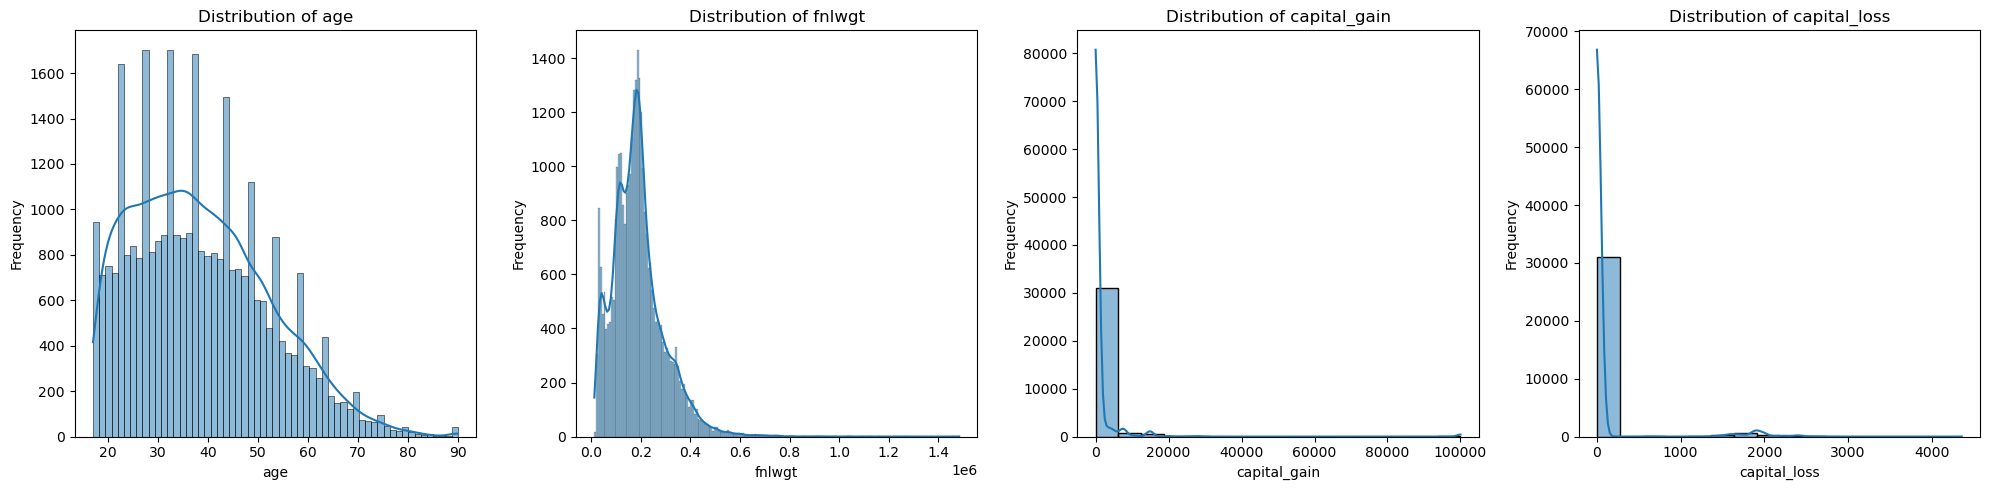


These visualizations confirm the skewness, suggesting that a transformation (like log transformation) would be beneficial to normalize these distributions for better model performance.


In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Visualizing Distributions of Significantly Skewed Features ---")
print("The following histograms with Kernel Density Estimates (KDE) show the current distributions of the identified skewed numerical features. Observe the long tails or asymmetry, which indicate skewness.")

# Set up the matplotlib figure and axes
num_plots = len(significantly_skewed_features )
fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Ensure axes is an array even if there's only one plot
if num_plots == 1:
    axes = [axes]

for i, col in enumerate(significantly_skewed_features ):
    sns.histplot(adult[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nThese visualizations confirm the skewness, suggesting that a transformation (like log transformation) would be beneficial to normalize these distributions for better model performance.")